<a href="https://colab.research.google.com/github/appletiger0704/Prediction-of-quality-of-Wine/blob/main/Prediction_of_quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from google.colab import data_table

# 繪圖
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
raw = pd.read_csv(url)
data_table.DataTable(raw, num_rows_per_page=10, include_index=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [60]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Feature

1 - fixed acidity： 固定酸度     

2 - volatile acidity： 揮發酸度

3 - citric acid：檸檬酸

4 - residual sugar：殘糖

5 - chlorides：氯化物

6 - free sulfur dioxide：游離案氧化硫

7 - total sulfur dioxide：總二氧化硫

8 - density：密度

9 - pH：酸鹼值

10 - sulphates：硫酸鹽

11 - alcohol：酒精

Output variable (based on sensory data):



---
Target


12 - quality (score between 0 and 10)

In [61]:
raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [62]:
# 查看個數據偏度
raw.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [63]:
def plot_destribution(df, var, target=None, **kwargs):
  with sns.axes_style('whitegrid'):
    row = kwargs.get("row", None)
    col = kwargs.get("col", None)
    facet = sns.FacetGrid(df, aspect=4, hue=target, row=row, col=col)
    facet.map(sns.kdeplot, var, fill=True)
    facet.add_legend=True
    plt.show()

def hist_distribution(col):
    sns.histplot(raw[col], bins=30, alpha=0.5, color="b")
    plt.title(col)

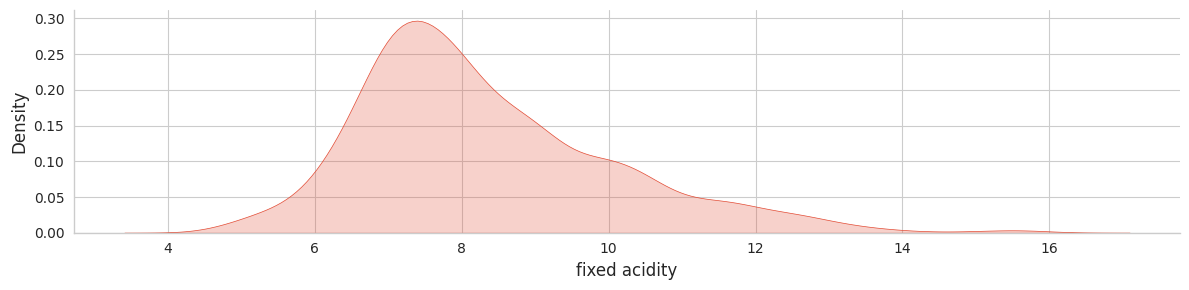

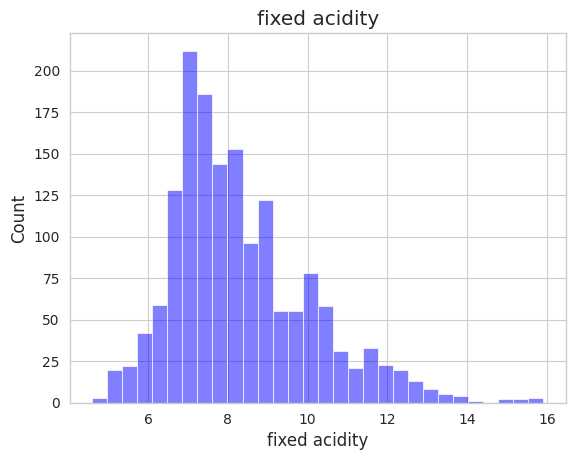

In [64]:
plot_destribution(raw, "fixed acidity")
hist_distribution("fixed acidity")

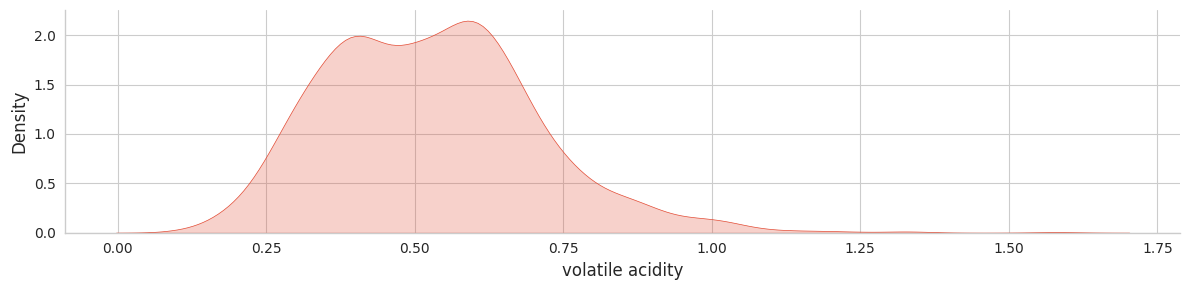

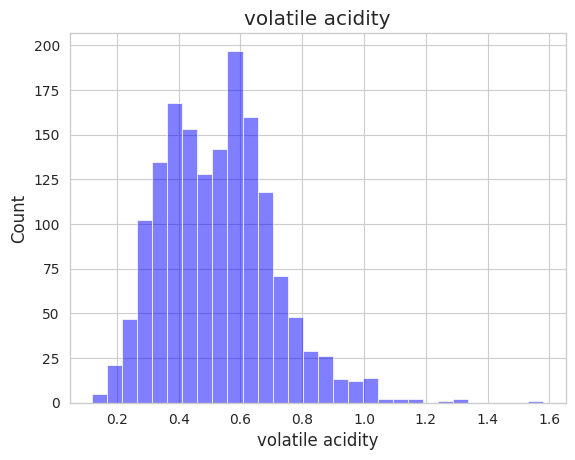

In [65]:
plot_destribution(raw, "volatile acidity")
hist_distribution("volatile acidity")

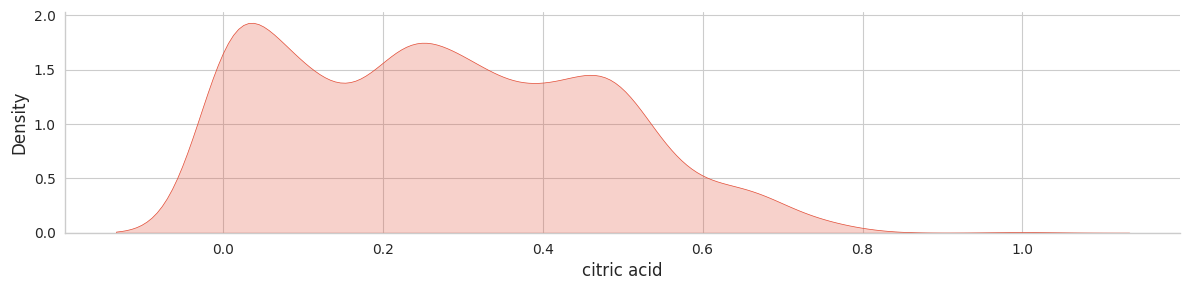

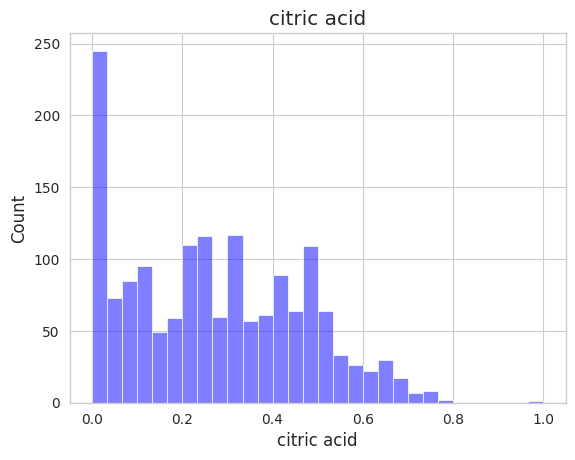

In [66]:
plot_destribution(raw, "citric acid")
hist_distribution("citric acid")

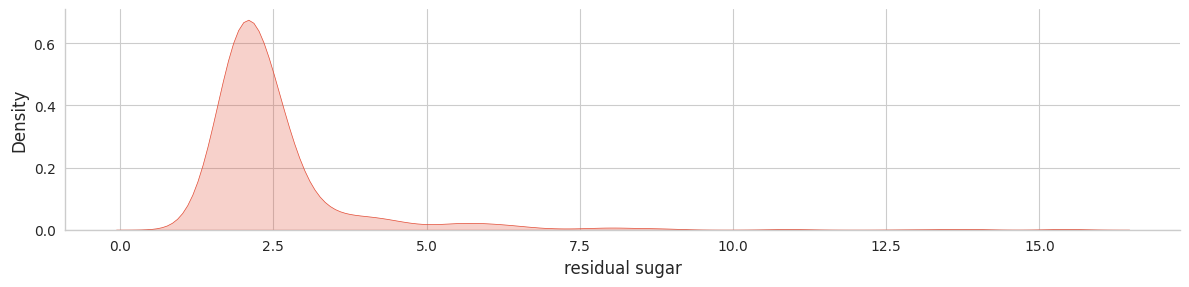

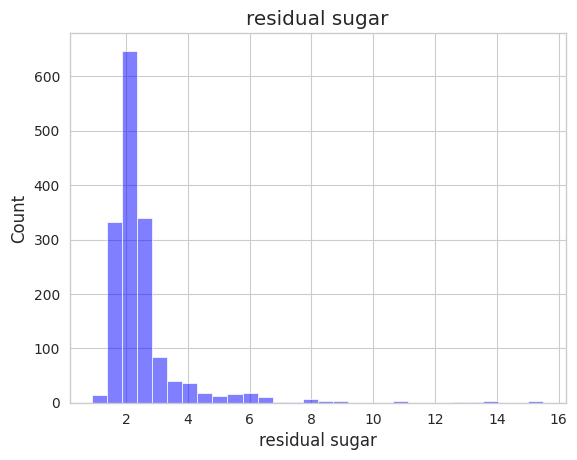

In [67]:
plot_destribution(raw, "residual sugar")
hist_distribution("residual sugar")

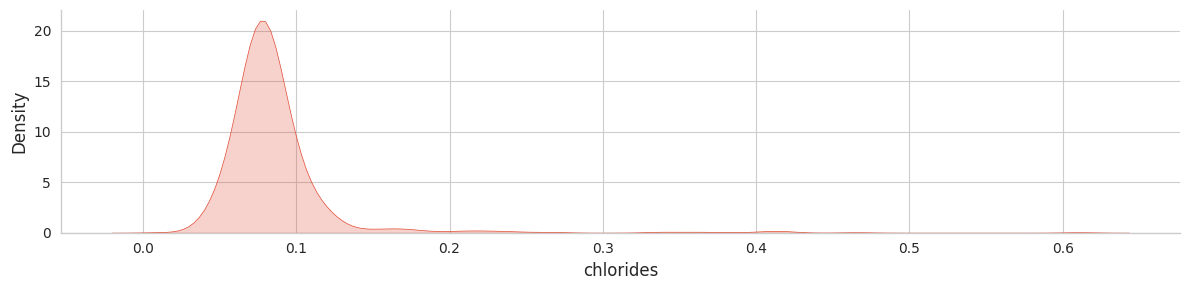

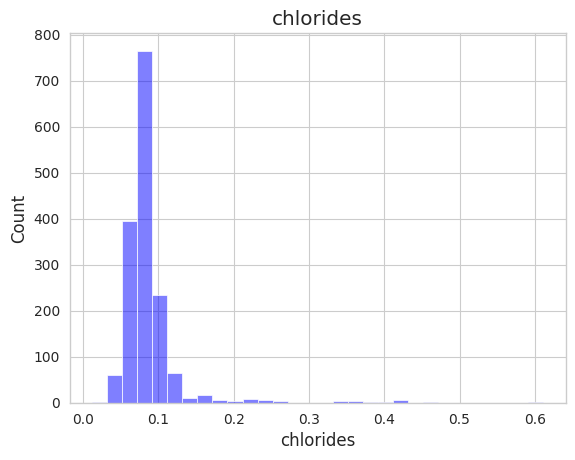

In [68]:
plot_destribution(raw, "chlorides")
hist_distribution("chlorides")

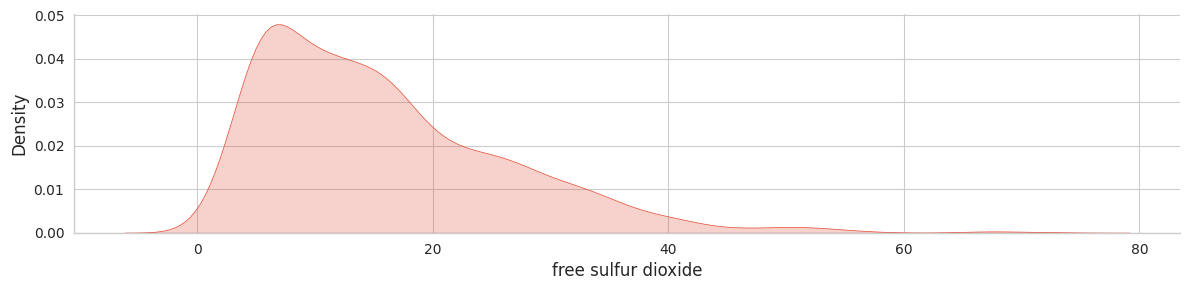

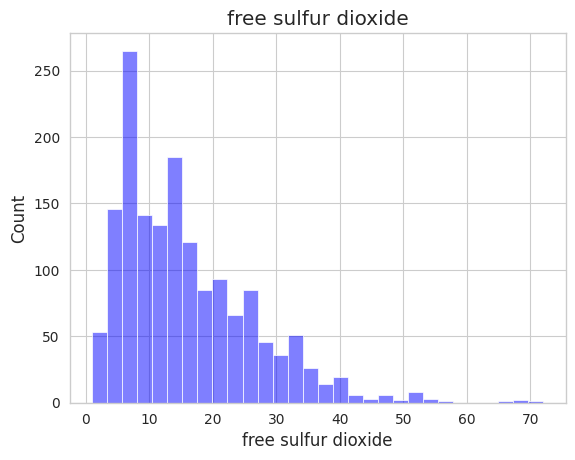

In [69]:
plot_destribution(raw, "free sulfur dioxide")
hist_distribution("free sulfur dioxide")

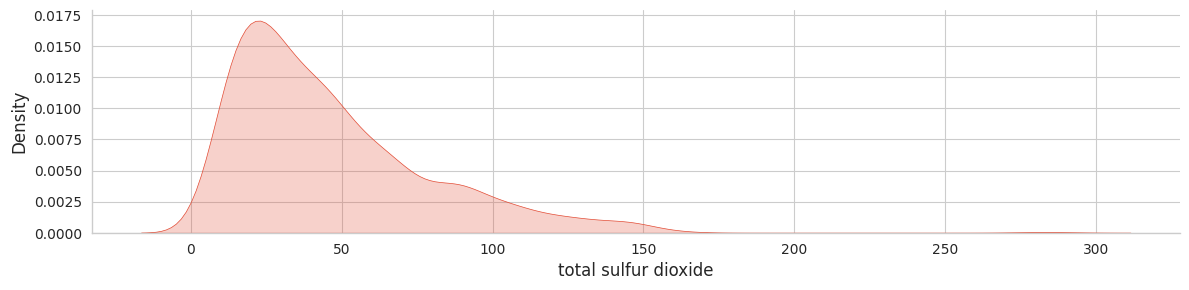

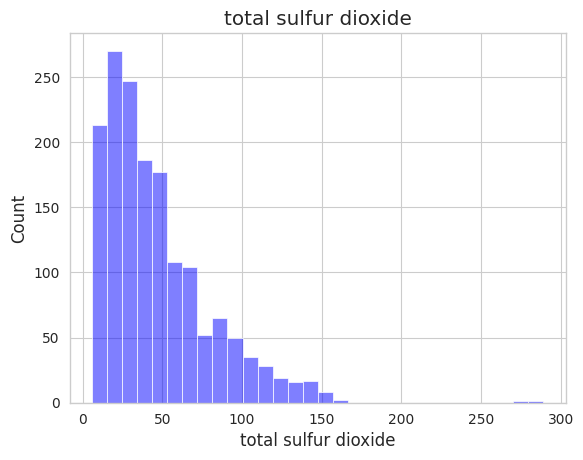

In [70]:
plot_destribution(raw, "total sulfur dioxide")
hist_distribution("total sulfur dioxide")

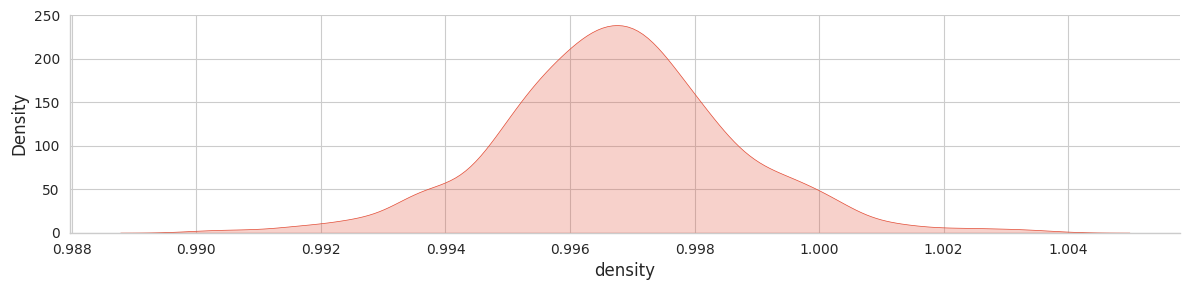

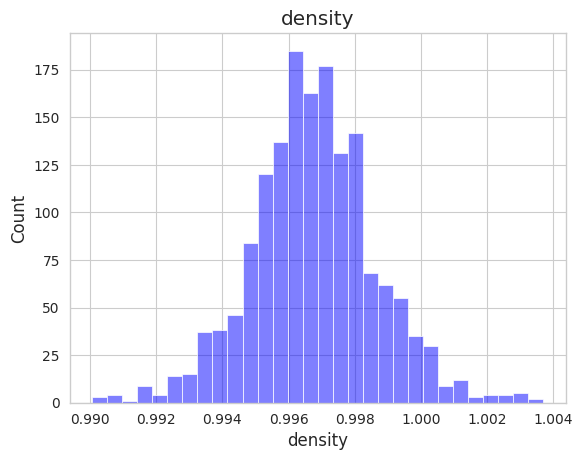

In [71]:
plot_destribution(raw, "density")
hist_distribution("density")

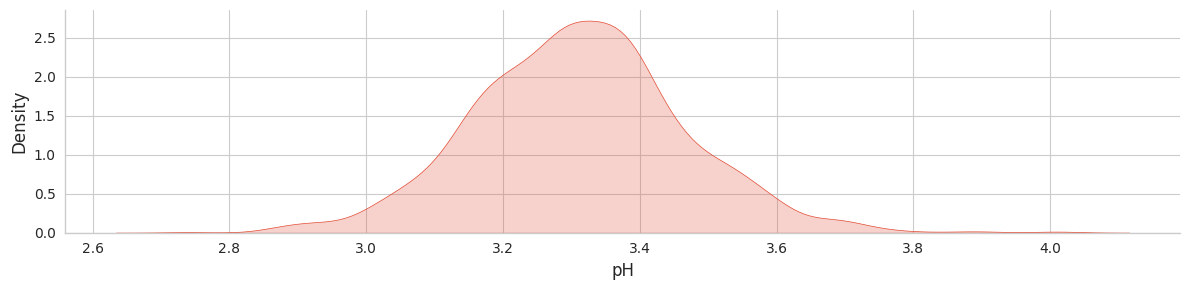

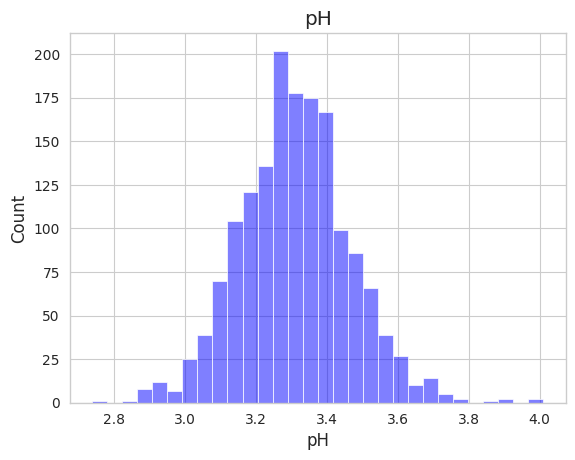

In [72]:
plot_destribution(raw, "pH")
hist_distribution("pH")

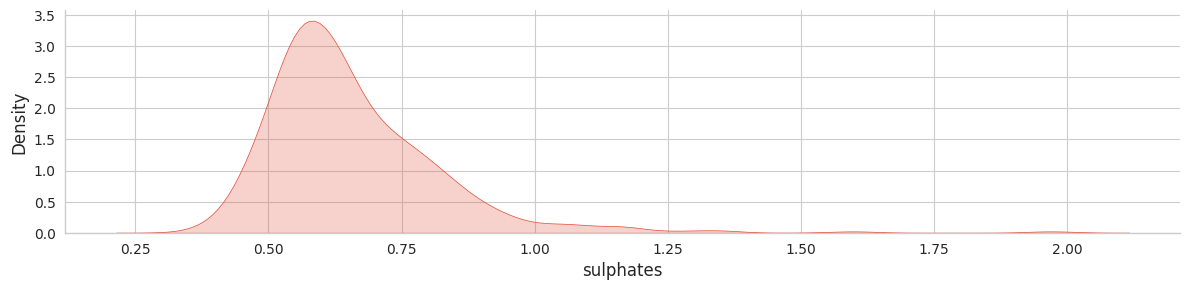

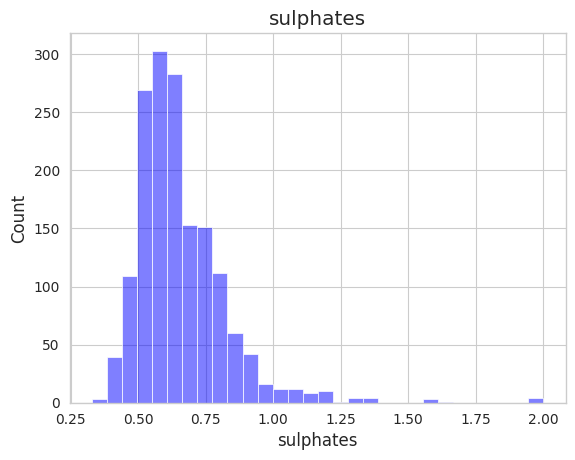

In [73]:
plot_destribution(raw, "sulphates")
hist_distribution("sulphates")

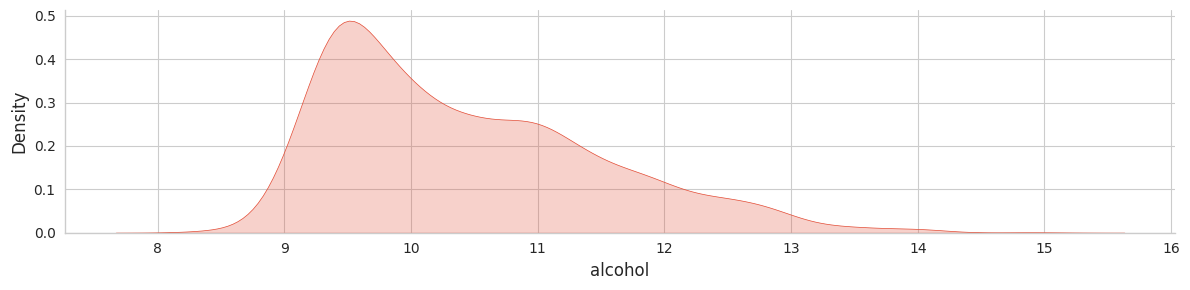

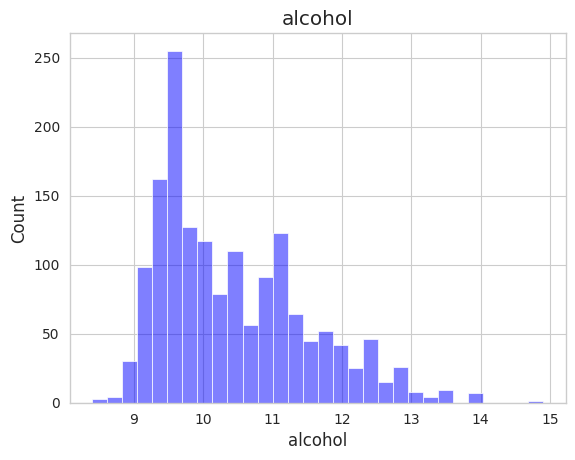

In [74]:
plot_destribution(raw, "alcohol")
hist_distribution("alcohol")

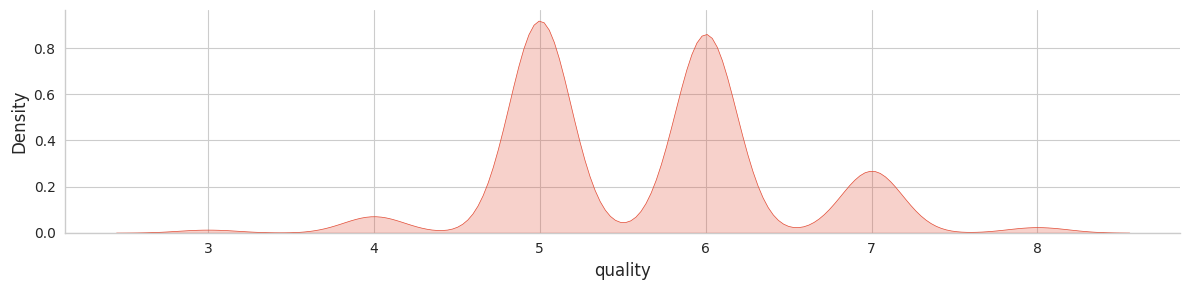

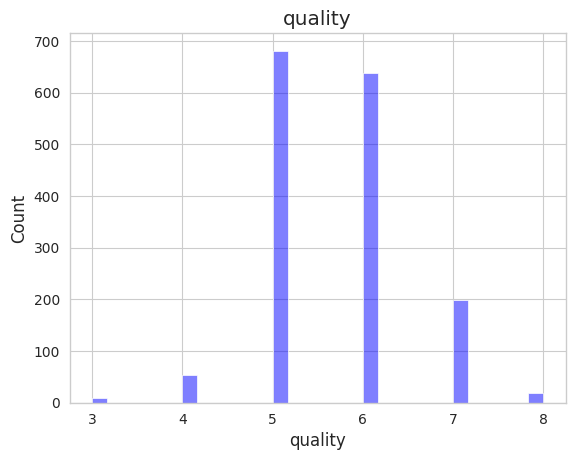

In [75]:
plot_destribution(raw, "quality")
hist_distribution("quality")

左偏：無左偏

右偏：fixed acidity、volatile acidity、citric acid、residual sugar、chlorides、free sulfur dioxide、total sulfur dioxide、sulphates、alcohol (共9種特徵右偏)

近乎正偏：PH、density、quality